In [1]:
from FactorSet import *
from gp_update_function import *
from InitStrategies import *
from PlotWrapper import *
from plan_next_experiment import *
import matplotlib.pyplot as plt
from plot_heatmaps import *
from sklearn.gaussian_process.kernels import RBF

In [2]:
#create a FactorSet class
my_factors = FactorSet()
my_factors.add_categorical(name="projectile", levels=["pingpong", "whiffle"])
my_factors.add_continuous(name="draw_angle", minimum=0, maximum=180)
my_factors.add_ordinal(name="rubber_bands", levels=[1, 2, 3])
create_new=False

In [3]:
#if create_new=True, create new samples
#else just import the samples
if create_new:
    X_LHS = latin_hypercube_design(my_factors,6)
    X_maximin = maximin_design(my_factors,6)
    X_random = random_design(my_factors,6)
else:
    X_LHS = pd.read_csv("LHS_Sample_Design_6Points.csv")
    X_maximin = pd.read_csv("Maximin_Sample_Design_6Points.csv")
    X_random = pd.read_csv("Random_Sample_Design_6Points.csv")

In [4]:
#plot all 3
#plot_design(X_LHS,my_factors,"Latin Hypercube Sampling design")
#plot_design(X_maximin,my_factors,"Maximin design")
#plot_design(X_random,my_factors,"Random design")

In [5]:
#create a Gaussian Process
kernel = RBF()
gp = GaussianProcessRegressor(kernel)

In [6]:
#Suppose we start with maximin design, train GP on maximin design
#First display X_maximin decoded
X_LHS

,draw_angle,projectile,rubber_bands
0,165.0,pingpong,2.0
1,75.0,whiffle,3.0
2,135.0,whiffle,2.0
3,15.0,pingpong,1.0
4,45.0,whiffle,3.0
5,105.0,pingpong,1.0


In [7]:
#record "responses"
y = [0.5, 1.3, 1.6, 1.7, 1.5, 1.2]

In [8]:
#train the GP on X_maximin and y
gp = train_model(gp,X_LHS,y,my_factors)
optimized_kernel = gp.kernel_
optimized_kernel

RBF(length_scale=1.56)

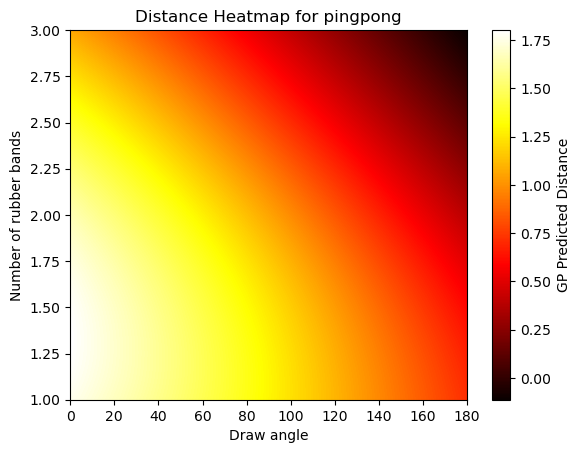

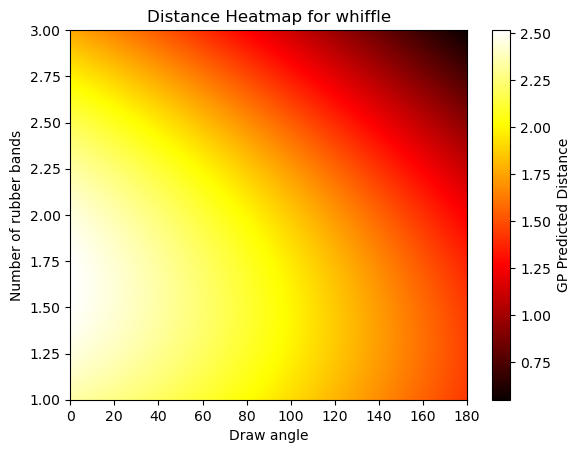

In [9]:
distance_heatmaps(gp,my_factors)

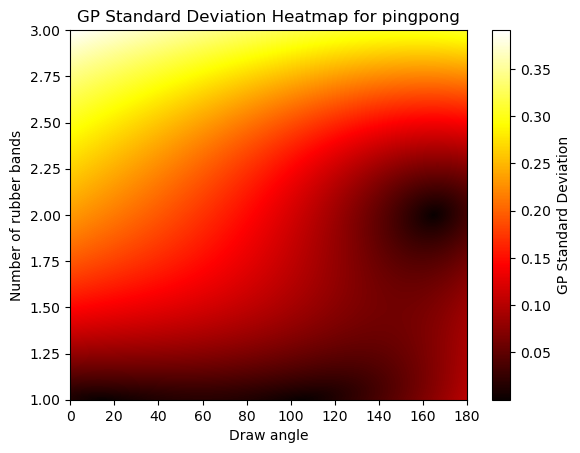

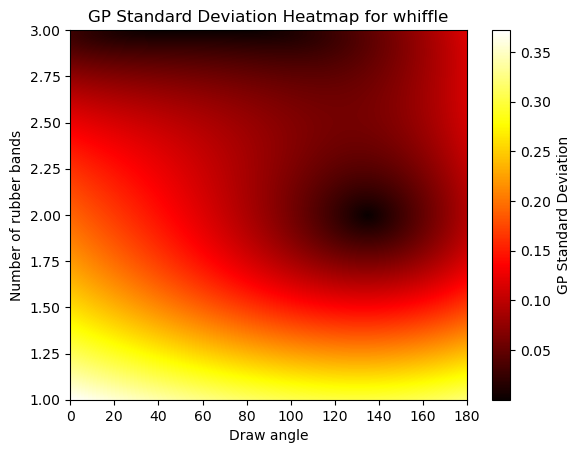

In [10]:
uncertainty_heatmaps(gp,my_factors)

In [11]:
factor_names = [factor[0] for factor in my_factors.factors]

In [28]:
#use this block of code to make gp predictions to ensure heatmaps are correct
#order here: draw_angle, projectile, rubber_bands
point_to_test_df = pd.DataFrame([(180.0, "pingpong", 3.0)], columns=factor_names)
a,b=model_predict(gp,point_to_test_df,my_factors)

array([-0.11240716])

In [30]:
b

array([0.30759414])

In [31]:
type(b)

numpy.ndarray

In [13]:
#want to suggest next experiment, let's say with exploitation
next_experiment_exploitation, obj_val = plan_next_experiment(y, my_factors, gp, "Exploitation")

In [14]:
next_experiment_exploitation

,draw_angle,projectile,rubber_bands
0,180.0,pingpong,3.0


# Perform next experiment, collect data, update model

In [15]:
new_y = 5 #inches
update_model(gp,next_experiment_exploitation,new_y,my_factors)

GaussianProcessRegressor(kernel=RBF(length_scale=1), optimizer=None)

In [16]:
gp.X_train_

array([[0.91666667, 0.        , 1.        ],
       [0.41666667, 1.        , 2.        ],
       [0.75      , 1.        , 1.        ],
       [0.08333333, 0.        , 0.        ],
       [0.25      , 1.        , 2.        ],
       [0.58333333, 0.        , 0.        ],
       [1.        , 0.        , 2.        ]])

In [17]:
gp.y_train_

array([0.5, 1.3, 1.6, 1.7, 1.5, 1.2, 5. ])

Right before the prediction
After the prediction
Before plotting for one projectile


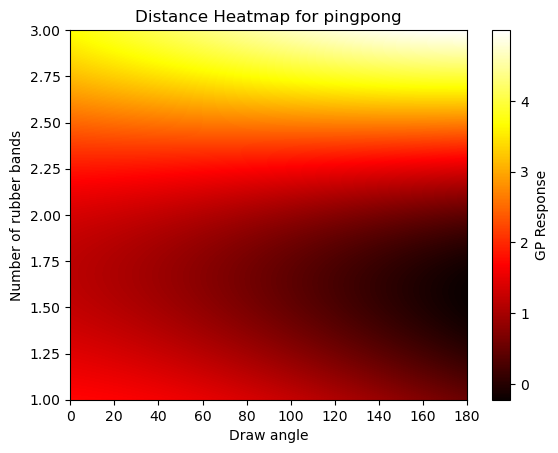

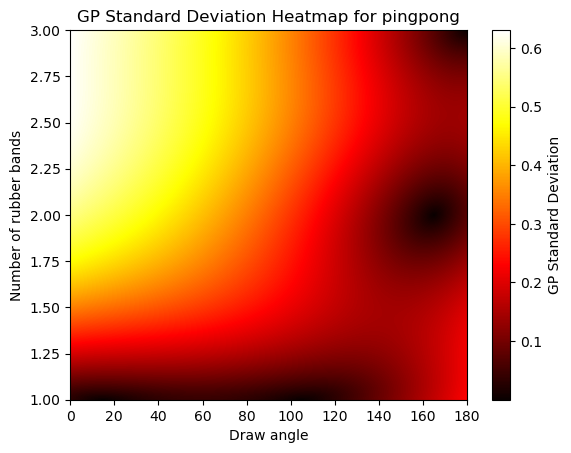

After plotting for one projectile
Right before the prediction
After the prediction
Before plotting for one projectile


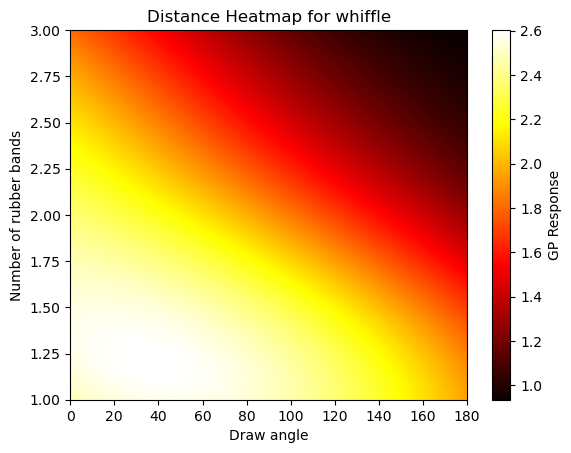

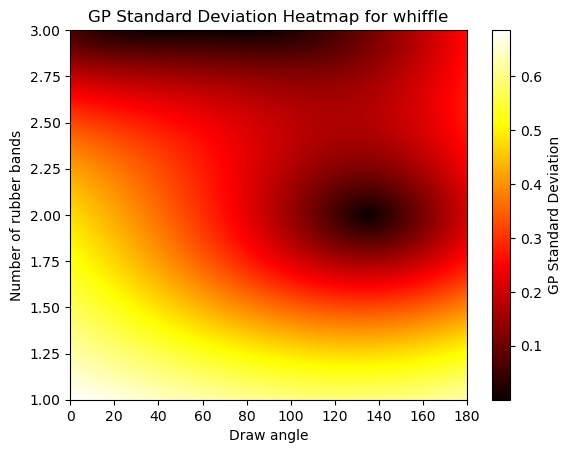

After plotting for one projectile


In [18]:
plot_heatmaps(gp, my_factors)

In [15]:
#want to suggest next experiment, let's say with exploitation again
next_experiment_exploration, obj_val = plan_next_experiment(y, my_factors, gp, "Exploitation")

In [16]:
next_experiment_exploration

,draw_angle,projectile,rubber_bands
0,180.0,pingpong,3.0


In [35]:
X_train = gp.X_train_

In [20]:
type(gp.y_train_)

numpy.ndarray

In [21]:
gp.y_train_

array([0.5, 1.3, 1.6, 1.7, 1.5, 1.2])

In [25]:
single_val = np.min(gp.y_train_)

In [24]:
type(np.min(gp.y_train_))

numpy.float64

In [26]:
single_val

0.5

In [38]:
type(single_val - gp.y_train_)

numpy.ndarray

In [39]:
a,b = gp.predict(X_train,return_std=True)

/Users/noelletoong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [40]:
a

array([0.5, 1.3, 1.6, 1.7, 1.5, 1.2])

In [41]:
b

array([1.00000004e-05, 1.00000060e-05, 1.00000004e-05, 1.00000004e-05,
       1.00000115e-05, 9.99998931e-06])

In [42]:
a/b

array([ 49999.99795523, 129999.92262686, 159999.99334365, 169999.99293321,
       149999.82709615, 120000.1282858 ])

In [43]:
norm.cdf(a/b)

array([1., 1., 1., 1., 1., 1.])